In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mpld3

In [21]:
df = pd.read_csv('./dataframes/pivot_alarms.csv')

In [22]:
df.head()

,DateTime,2421,2445,4203,6280,6336,7167,9218,9219,9495,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
0,2022-01-03 09:38:48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-03 09:39:18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2022-01-03 09:53:36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-01-03 10:11:28,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-03 10:31:02,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index(df['DateTime'], inplace=True)

In [25]:
df.drop(columns=['DateTime'], inplace=True)

<Axes: >

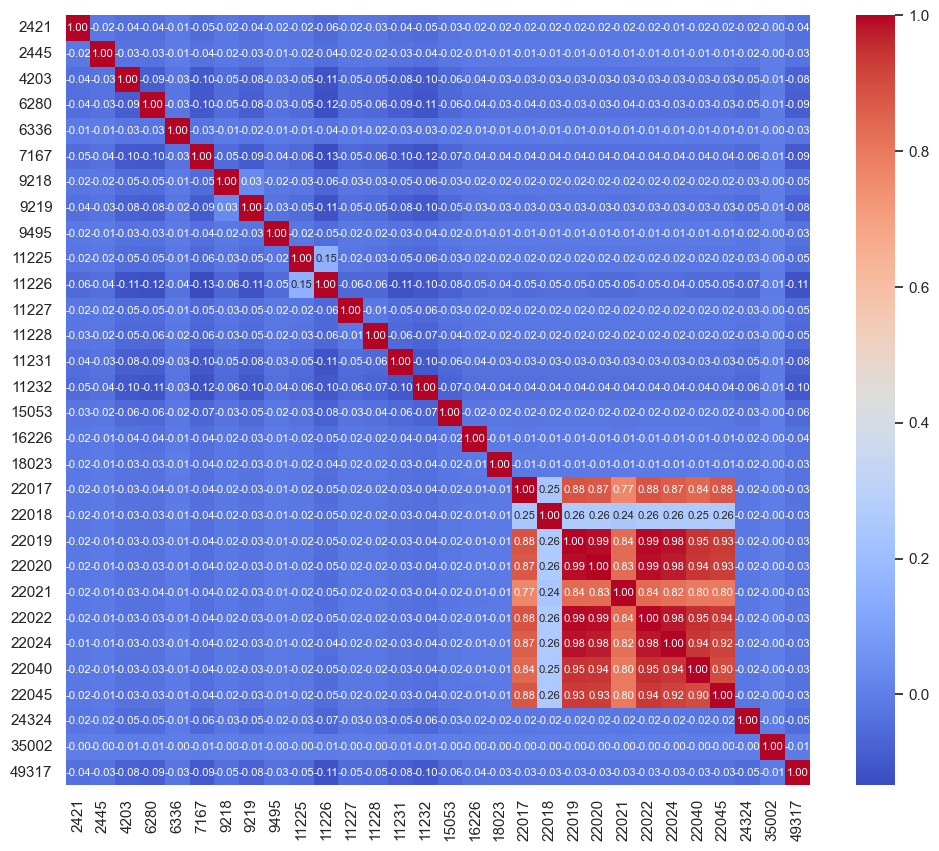

In [26]:
corr_matrix = df.corr()
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize':8})

In [27]:
import itertools

# Assuming your binary dfset is stored in a pandas dfFrame called 'df'
# Extract the columns containing binary values
columns = df.columns[1:]  # Exclude the DateTime column

# Create a list to store Jaccard similarity indices
jaccard_indices = []

# Iterate through all possible pairs of columns
for pair in itertools.combinations(columns, 2):
    column1, column2 = pair
    intersection = ((df[column1] == 1) & (df[column2] == 1)).sum()
    union = ((df[column1] == 1) | (df[column2] == 1)).sum()
    jaccard_index = intersection / union
    jaccard_indices.append((pair, jaccard_index))

# Print the computed Jaccard similarity indices for each pair
for pair, jaccard_index in jaccard_indices:
    print(pair, jaccard_index)

('2445', '4203') 0.0
('2445', '6280') 0.0
('2445', '6336') 0.0
('2445', '7167') 0.00019559902200488998
('2445', '9218') 0.0
('2445', '9219') 0.0002631578947368421
('2445', '9495') 0.0
('2445', '11225') 0.0
('2445', '11226') 0.0
('2445', '11227') 0.0
('2445', '11228') 0.0
('2445', '11231') 0.0
('2445', '11232') 0.0
('2445', '15053') 0.0
('2445', '16226') 0.0
('2445', '18023') 0.0
('2445', '22017') 0.0
('2445', '22018') 0.0
('2445', '22019') 0.0
('2445', '22020') 0.0
('2445', '22021') 0.0
('2445', '22022') 0.0
('2445', '22024') 0.0
('2445', '22040') 0.0
('2445', '22045') 0.0
('2445', '24324') 0.0002932551319648094
('2445', '35002') 0.0
('2445', '49317') 0.0
('4203', '6280') 0.00013952839402818474
('4203', '6336') 0.0
('4203', '7167') 6.246486351427322e-05
('4203', '9218') 0.0
('4203', '9219') 0.0006728468899521532
('4203', '9495') 0.0
('4203', '11225') 0.00010793308148947653
('4203', '11226') 5.135579293344289e-05
('4203', '11227') 0.0
('4203', '11228') 0.00029824038174768865
('4203', '1

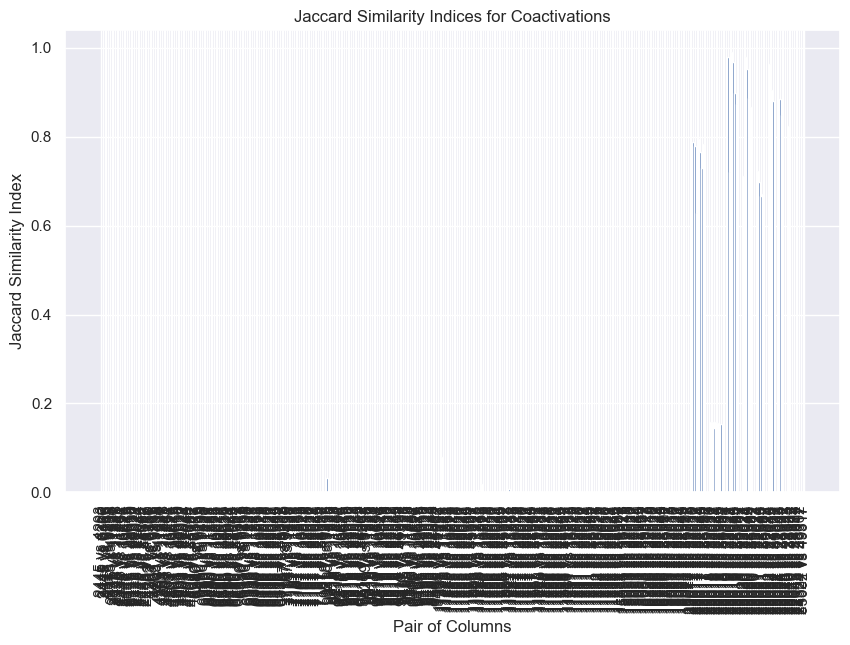

In [9]:
import matplotlib.pyplot as plt

# Assuming you have the computed Jaccard similarity indices in a list called 'jaccard_indices'

# Extract the pairs and indices from the list
pairs, indices = zip(*jaccard_indices)

# Extract the names of the pairs for labeling the x-axis
pair_names = [f'{pair[0]} vs {pair[1]}' for pair in pairs]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(pair_names, indices)
plt.xticks(rotation=90)
plt.xlabel('Pair of Columns')
plt.ylabel('Jaccard Similarity Index')
plt.title('Jaccard Similarity Indices for Coactivations')

# Display the plot
plt.show()


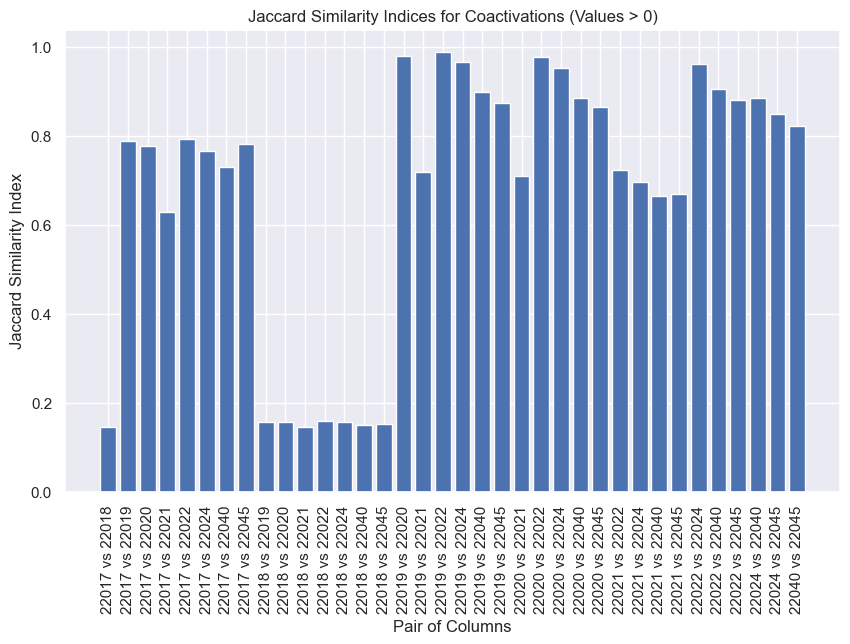

In [16]:
import matplotlib.pyplot as plt

# Assuming you have the computed Jaccard similarity indices in a list called 'jaccard_indices'

# Filter the indices and pairs to include only values greater than 0
filtered_indices, filtered_pairs = zip(*[(index, pair) for index, pair in zip(indices, pairs) if index > 0.14])

# Extract the names of the pairs for labeling the x-axis
pair_names = [f'{pair[0]} vs {pair[1]}' for pair in filtered_pairs]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(pair_names, filtered_indices)
plt.xticks(rotation=90)
plt.xlabel('Pair of Columns')
plt.ylabel('Jaccard Similarity Index')
plt.title('Jaccard Similarity Indices for Coactivations (Values > 0)')

# Display the plot
plt.show()


TypeError: Image data of dtype object cannot be converted to float

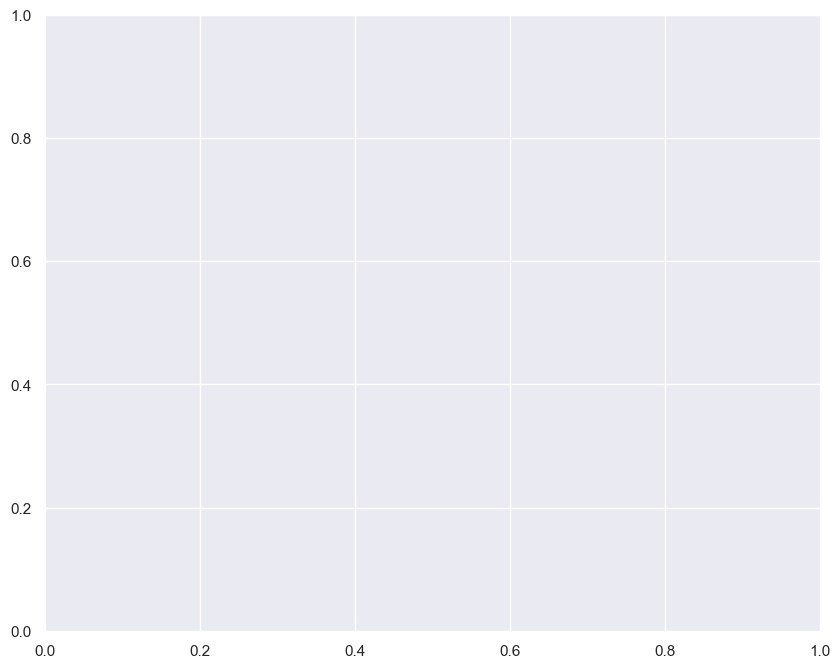

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the computed Jaccard similarity indices in a list called 'jaccard_indices'

# Create a DataFrame to store the Jaccard similarity indices
df = pd.DataFrame(index=range(num_items), columns=range(num_items))

# Fill the DataFrame with the Jaccard similarity indices
for pair, index in zip(pairs, indices):
    item1, item2 = pair
    df.loc[item1, item2] = index
    df.loc[item2, item1] = index

# Create a heat map plot
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel('Item')
plt.ylabel('Item')
plt.title('Jaccard Similarity Indices Heat Map')

# Display the plot
plt.show()


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the computed Jaccard similarity indices in a list called 'jaccard_indices'

# Create an empty matrix to store the similarity indices
num_items = len(set([pair[0] for pair in pairs] + [pair[1] for pair in pairs]))
matrix = np.zeros((num_items, num_items))

# Fill the matrix with the Jaccard similarity indices
for pair, index in zip(pairs, indices):
    item1, item2 = pair
    matrix[item1, item2] = index
    matrix[item2, item1] = index

# Create a heat map plot
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=True, yticklabels=True)
plt.xlabel('Item')
plt.ylabel('Item')
plt.title('Jaccard Similarity Indices Heat Map')

# Display the plot
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

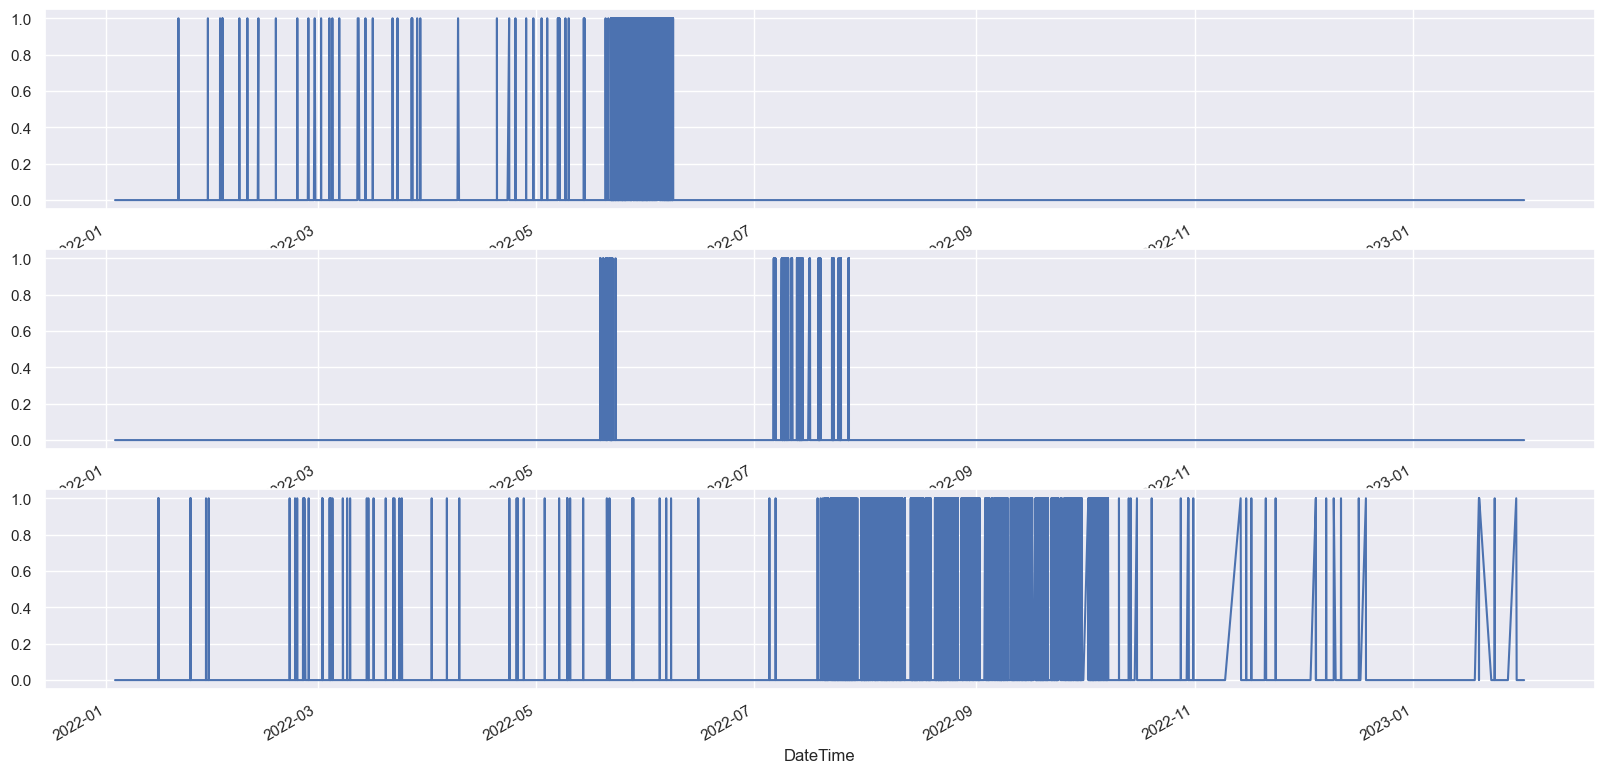

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10))

df['2421'].plot(ax =ax1)
df['2445'].plot(ax=ax2)
df['11226'].plot(ax=ax3)

plt.show()

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8) 
principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

In [27]:
variance_ratio = sum(pca.explained_variance_ratio_)

In [28]:
variance_ratio

0.717002771056785

In [29]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=df.columns)

print(loadings['PC1'].sort_values(ascending=False))

11226    0.942554
11225    0.096845
35002   -0.000200
6336    -0.003727
2445    -0.005661
18023   -0.005896
9495    -0.006468
16226   -0.007641
2421    -0.010439
22018   -0.011060
11228   -0.012366
11227   -0.012592
24324   -0.014865
9218    -0.015751
22021   -0.021003
22024   -0.021209
22017   -0.021663
22040   -0.021712
22019   -0.021725
22022   -0.021749
22020   -0.021756
22045   -0.021863
15053   -0.024094
9219    -0.074311
49317   -0.077524
4203    -0.079492
11231   -0.082234
6280    -0.101591
11232   -0.150392
7167    -0.197888
Name: PC1, dtype: float64


In [30]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
2421,-0.010439,-0.007406,0.007978,-0.008980,-0.003883,-0.005917,0.001098,0.002605
2445,-0.005661,-0.003992,0.003864,-0.004738,-0.001990,-0.003005,0.000499,0.001606
4203,-0.079492,-0.072277,0.105253,-0.142185,-0.139732,-0.452573,-0.700900,-0.310943
6280,-0.101591,-0.101675,0.176978,-0.273253,0.810196,0.291690,-0.025302,-0.060775
6336,-0.003727,-0.002578,0.002649,-0.003165,-0.001284,-0.001906,0.000306,0.000820
7167,-0.197888,-0.371880,-0.710955,0.446871,0.061430,0.075286,-0.010430,-0.024926
9218,-0.015751,-0.011783,0.014167,-0.017961,-0.010511,-0.021576,0.005266,0.057003
9219,-0.074311,-0.064381,0.091048,-0.123293,-0.099603,-0.241808,0.065566,0.855793
9495,-0.006468,-0.004521,0.004743,-0.005478,-0.002256,-0.003458,0.000560,0.001512
11225,0.096845,-0.006464,-0.002382,0.002342,-0.000319,-0.000180,0.000037,0.000237


In [31]:
loadings.max()

PC1    0.942554
PC2    0.906737
PC3    0.219708
PC4    0.446871
PC5    0.810196
PC6    0.708605
PC7    0.708456
PC8    0.855793
dtype: float64

In [32]:
loadings.min()

PC1   -0.197888
PC2   -0.371880
PC3   -0.710955
PC4   -0.273253
PC5   -0.537838
PC6   -0.452573
PC7   -0.700900
PC8   -0.394871
dtype: float64

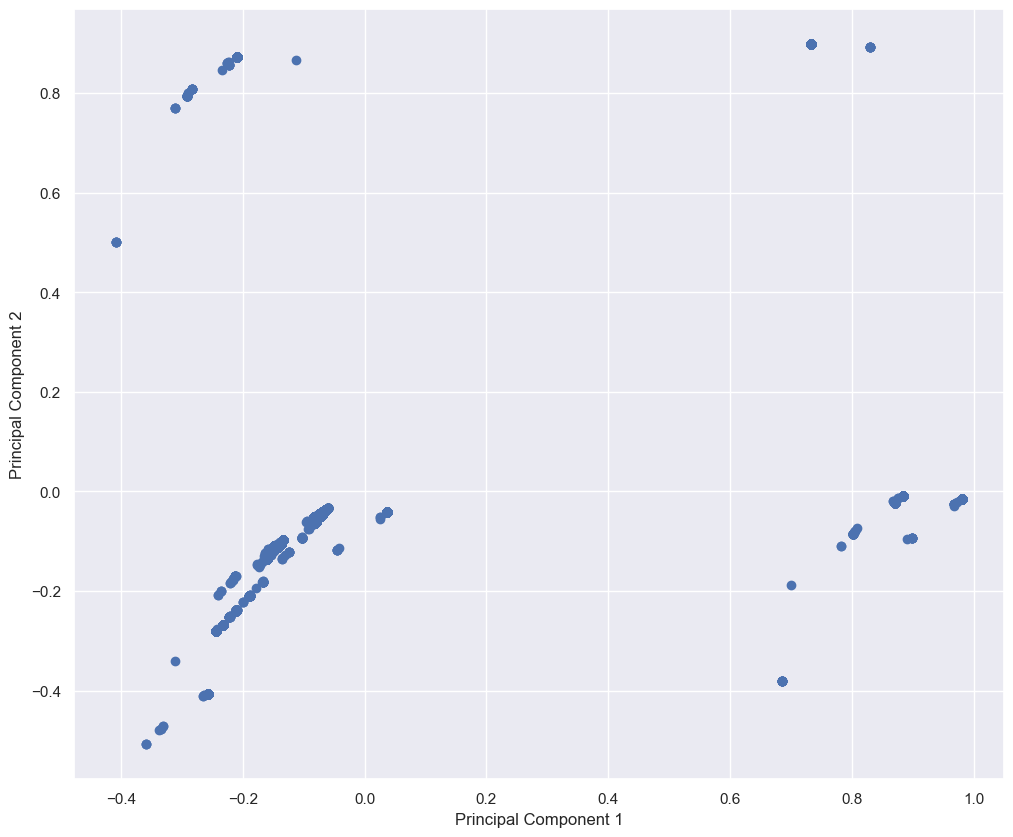

In [33]:

plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [34]:
df['time_diff'] = df.index.to_series().diff().dt.total_seconds().fillna(0)

In [35]:
df['time_diff']

DateTime
2022-01-03 09:38:48       0.0
2022-01-03 09:39:18      30.0
2022-01-03 09:53:36     858.0
2022-01-03 10:11:28    1072.0
2022-01-03 10:31:02    1174.0
                        ...  
2023-01-31 23:57:10       2.0
2023-01-31 23:58:37      87.0
2023-01-31 23:58:43       6.0
2023-01-31 23:59:13      30.0
2023-01-31 23:59:15       2.0
Name: time_diff, Length: 90775, dtype: float64

In [63]:
df2 = df.copy()

In [59]:
df.index = pd.to_datetime(df.index)

In [61]:
import itertools

for a1, a2 in itertools.combinations(df.columns, 2):
    lag_col_name = f"{a1}_{a2}_lag"
    df[lag_col_name] = (df.index.to_series().diff(periods=1) * (df[a2] - df[a1])).dt.total_seconds()

C:\Users\manda\AppData\Local\Temp\ipykernel_18364\3991694866.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lag_col_name] = (df.index.to_series().diff(periods=1) * (df[a2] - df[a1])).dt.total_seconds()
C:\Users\manda\AppData\Local\Temp\ipykernel_18364\3991694866.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lag_col_name] = (df.index.to_series().diff(periods=1) * (df[a2] - df[a1])).dt.total_seconds()
C:\Users\manda\AppData\Local\Temp\ipykernel_18364\3991694866.py:5: PerformanceWarning: DataFrame is highly fragmen

In [62]:
df

,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22040_22045_lag,22040_24324_lag,22040_35002_lag,22040_49317_lag,22045_24324_lag,22045_35002_lag,22045_49317_lag,24324_35002_lag,24324_49317_lag,35002_49317_lag
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:38:48,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 09:39:18,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,30.0,0.0,0.0,30.0,0.0,30.0,30.0
2022-01-03 09:53:36,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,858.0,0.0,0.0,858.0,0.0,858.0,858.0
2022-01-03 10:11:28,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 10:31:02,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:57:10,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:58:37,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:58:43,0,0,0,0,0,0,0,0,0,0,...,0.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,0.0,0.0,0.0


In [47]:
df['time_diff'] = pd.to_datetime(df['time_diff'])

In [49]:
df.dtypes

2421                  int64
2445                  int64
4203                  int64
6280                  int64
6336                  int64
7167                  int64
9218                  int64
9219                  int64
9495                  int64
11225                 int64
11226                 int64
11227                 int64
11228                 int64
11231                 int64
11232                 int64
15053                 int64
16226                 int64
18023                 int64
22017                 int64
22018                 int64
22019                 int64
22020                 int64
22021                 int64
22022                 int64
22024                 int64
22040                 int64
22045                 int64
24324                 int64
35002                 int64
49317                 int64
time_diff    datetime64[ns]
dtype: object

In [51]:
import itertools

for a1, a2 in itertools.combinations(df2.columns, 2):
    df2[f"{a1}_{a2}_diff"] = (df2.index.to_series().diff()[a2] - df2.index.to_series().diff()[a1]).dt.total_seconds()


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2445-01-01 00:00:00